In [3]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [4]:
accesscm2_pr_file = "data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc"

In [5]:
ds = xr.open_dataset(accesscm2_pr_file)
print(ds)

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 60, bnds: 2, lon: 192, lat: 144)
Coordinates:
  * time       (time) datetime64[ns] 480B 2010-01-16T12:00:00 ... 2014-12-16T...
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 960B ...
    lon_bnds   (lon, bnds) float64 3kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    pr         (time, lat, lon) float32 7MB ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    cmor_version:   

In [6]:
print(ds["pr"])

<xarray.DataArray 'pr' (time: 60, lat: 144, lon: 192)> Size: 7MB
[1658880 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 480B 2010-01-16T12:00:00 ... 2014-12-16T12...
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella


In [7]:
clim = ds["pr"].mean("time", keep_attrs=True)
print(clim)

<xarray.DataArray 'pr' (lat: 144, lon: 192)> Size: 111kB
array([[1.8461452e-06, 1.9054805e-06, 1.9228980e-06, ..., 1.9869783e-06,
        2.0026005e-06, 1.9683730e-06],
       [1.9064508e-06, 1.9021350e-06, 1.8931637e-06, ..., 1.9433096e-06,
        1.9182237e-06, 1.9072245e-06],
       [2.1003202e-06, 2.0477617e-06, 2.0348527e-06, ..., 2.2391034e-06,
        2.1970161e-06, 2.1641599e-06],
       ...,
       [7.5109556e-06, 7.4777777e-06, 7.4689174e-06, ..., 7.3359679e-06,
        7.3987890e-06, 7.3978440e-06],
       [7.1837171e-06, 7.1722038e-06, 7.1926393e-06, ..., 7.1552149e-06,
        7.1576678e-06, 7.1592167e-06],
       [7.0353467e-06, 7.0403985e-06, 7.0326828e-06, ..., 7.0392648e-06,
        7.0387587e-06, 7.0304386e-06]], dtype=float32)
Coordinates:
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      

In [8]:
type(clim.data)


numpy.ndarray

In [9]:
clim.data = clim.data * 86400
clim.attrs["units"] = "mm/day"

print(clim)

<xarray.DataArray 'pr' (lat: 144, lon: 192)> Size: 221kB
array([[0.15950695, 0.16463352, 0.16613839, ..., 0.17167493, 0.17302468,
        0.17006743],
       [0.16471735, 0.16434446, 0.16356934, ..., 0.16790195, 0.16573453,
        0.1647842 ],
       [0.18146767, 0.17692661, 0.17581128, ..., 0.19345854, 0.18982219,
        0.18698342],
       ...,
       [0.64894656, 0.64607999, 0.64531446, ..., 0.63382763, 0.63925537,
        0.63917372],
       [0.62067316, 0.61967841, 0.62144403, ..., 0.61821057, 0.6184225 ,
        0.61855632],
       [0.60785395, 0.60829043, 0.60762379, ..., 0.60819248, 0.60814875,
        0.6074299 ]])
Coordinates:
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          mm/day
    comment:        includes both liquid and solid phases
    cell_methods:   area

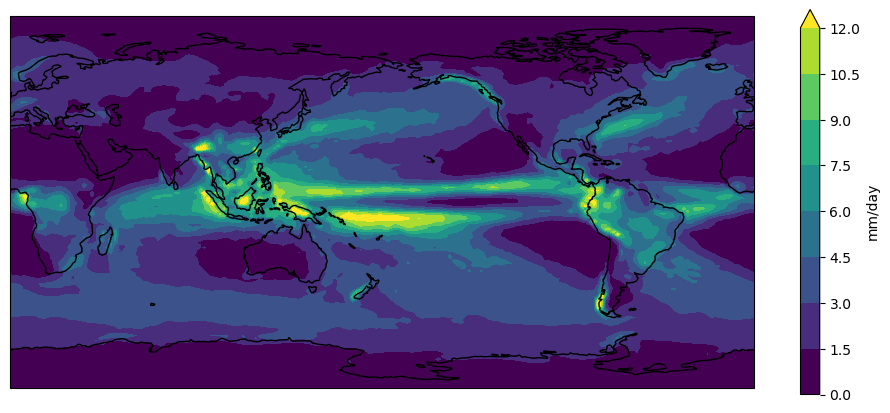

In [10]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(
    ax=ax,
    levels=np.arange(0, 13.5, 1.5),
    extend="max",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": clim.units}
)
ax.coastlines()

plt.show()

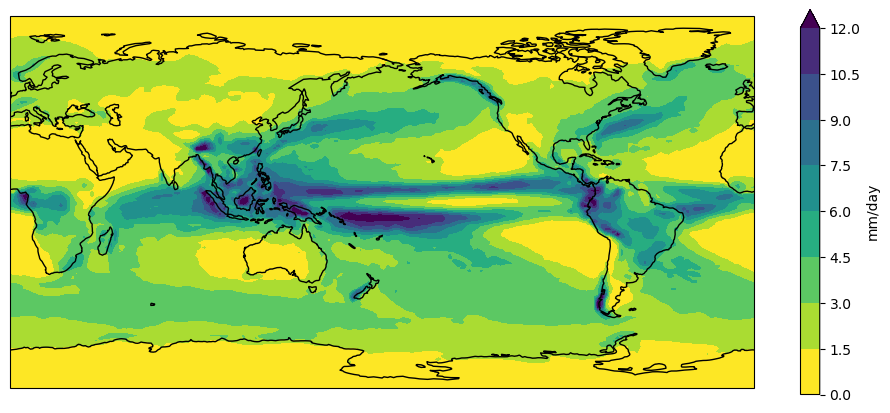

In [11]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np


accesscm2_pr_file = "data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc"

ds = xr.open_dataset(accesscm2_pr_file)

clim = ds["pr"].mean("time", keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs["units"] = "mm/day"

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(
    ax=ax,
    levels=np.arange(0, 13.5, 1.5),
    extend="max",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": clim.units},
    cmap="viridis_r",
)
ax.coastlines()
plt.show()

In [13]:
pip install cmocean

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


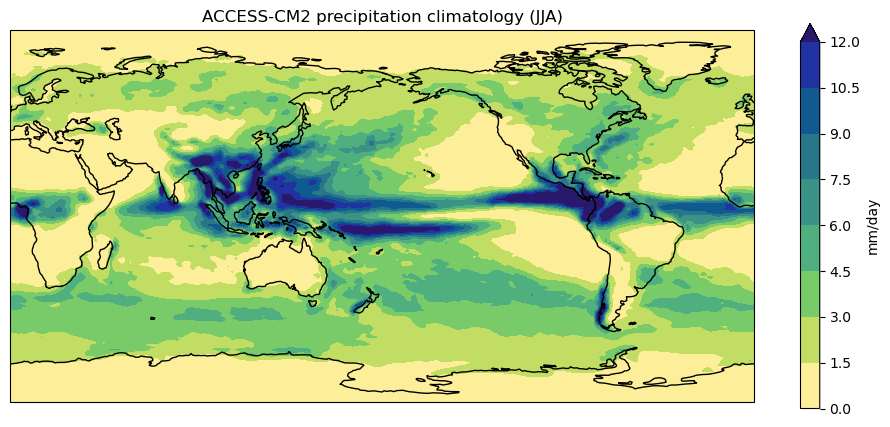

In [14]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean


accesscm2_pr_file = "data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc"

ds = xr.open_dataset(accesscm2_pr_file)

clim = ds["pr"].groupby("time.season").mean("time", keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = "mm/day"

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.sel(season="JJA").plot.contourf(
    ax=ax,
    levels=np.arange(0, 13.5, 1.5),
    extend="max",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": clim.units},
    cmap=cmocean.cm.haline_r,
)
ax.coastlines()

model = ds.attrs["source_id"]
title = f"{model} precipitation climatology (JJA)"
plt.title(title)

plt.show()

In [15]:
def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines
    
    """

    ds = xr.open_dataset(pr_file)

    clim = ds["pr"].groupby("time.season").mean("time", keep_attrs=True)

    clim.data = clim.data * 86400
    clim.attrs["units"] = "mm/day"

    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(
        ax=ax,
        levels=np.arange(0, 13.5, 1.5),
        extend="max",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": clim.units},
        cmap=cmocean.cm.haline_r,
    )
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    model = ds.attrs["source_id"]
    title = f"{model} precipitation climatology ({season})"
    plt.title(title)

In [16]:
help(plot_pr_climatology)

Help on function plot_pr_climatology in module __main__:

plot_pr_climatology(pr_file, season, gridlines=False)
    Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines



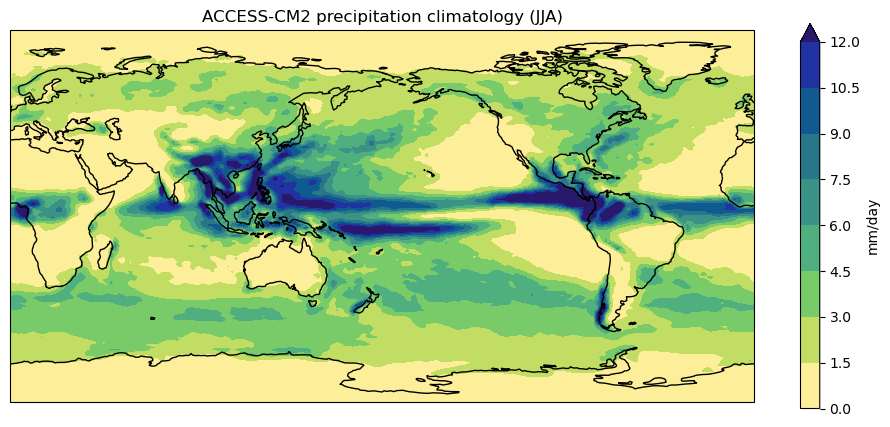

In [17]:
plot_pr_climatology("data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc", "JJA")
plt.show()

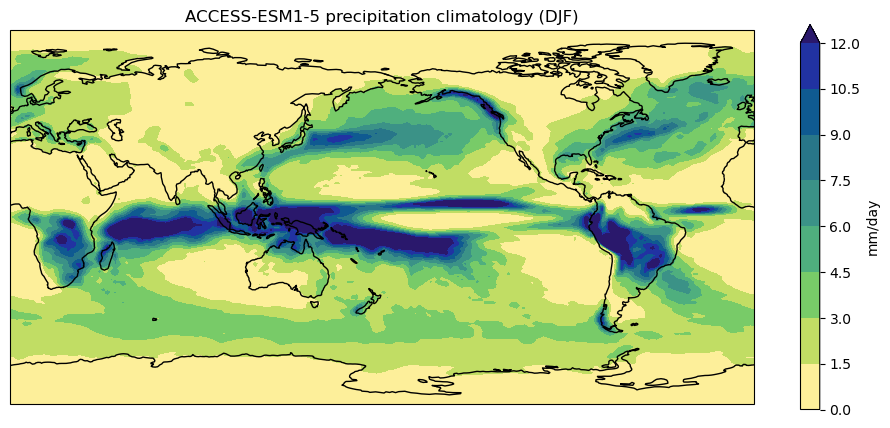

In [18]:
plot_pr_climatology("data/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_201001-201412.nc", "DJF")
plt.show()

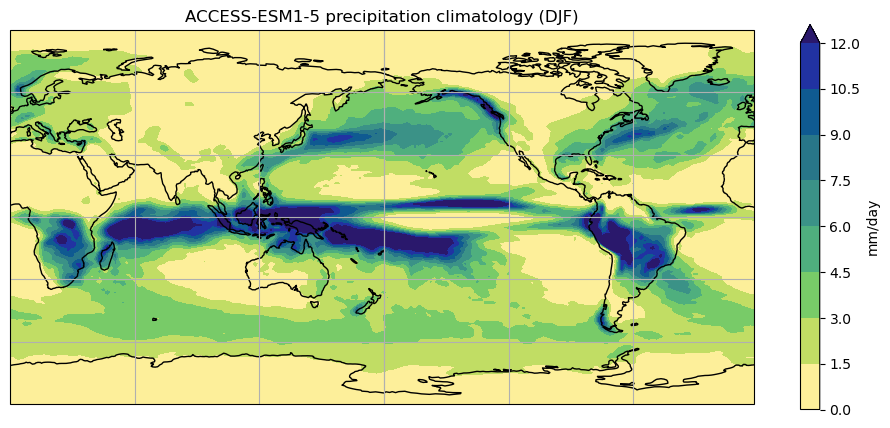

In [19]:
plot_pr_climatology(
    "data/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_201001-201412.nc",
    "DJF",
    gridlines=True,
)
plt.show()

In [20]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import argparse


def convert_pr_units(da):
    """Convert kg m-2 s-1 to mm day-1.
    
    Args:
      da (xarray.DataArray): Precipitation data
    
    """
    
    da.data = darray.data * 86400
    da.attrs["units"] = "mm/day"
    
    return da


def create_plot(clim, model, season, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      clim (xarray.DataArray): Precipitation climatology data
      model (str): Name of the climate model
      season (str): Season
      
    Kwargs:  
      gridlines (bool): Select whether to plot gridlines    
    
    """
        
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(
        ax=ax,
        levels=np.arange(0, 13.5, 1.5),
        extend="max",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": clim.units},
        cmap=cmocean.cm.haline_r,
    )
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    title = f"{model} precipitation climatology ({season})"
    plt.title(title)


def main(inargs):
    """Run the program."""

    ds = xr.open_dataset(inargs.pr_file)
    
    clim = ds["pr"].groupby("time.season").mean("time", keep_attrs=True)
    clim = convert_pr_units(clim)

    create_plot(clim, ds.attrs["source_id"], inargs.season)
    plt.savefig(
        inargs.output_file,
        dpi=200,
        bbox_inches="tight",
        facecolor="white",
    )


if __name__ == "__main__":
    description='Plot the precipitation climatology.'
    parser = argparse.ArgumentParser(description=description)
    
    parser.add_argument("pr_file", type=str, help="Precipitation data file")
    parser.add_argument("season", type=str, help="Season to plot")
    parser.add_argument("output_file", type=str, help="Output file name")

    args = parser.parse_args()
    
    main(args)

usage: ipykernel_launcher.py [-h] pr_file season output_file
ipykernel_launcher.py: error: the following arguments are required: season, output_file


SystemExit: 2

C:\Users\DANIEL\anaconda3\envs\dani\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
